<a href="https://colab.research.google.com/github/lwatso/CIND820/blob/main/L_Watson_Final_Results_and_the_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd                  #Importing Pandas library
import numpy as np                   #Importing numpy library
import seaborn as sns
import matplotlib.pyplot as plt      # Import matplotlib library
import os

In [5]:
import pandas as pd
data = pd.read_excel('Absenteeism_at_work.xlsx')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1. Summarize & Visualize the Dataset**
---
---

In [10]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Workload,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


**2. Dataset Preparation**
---
---

In [11]:
#Dropping the ID column since it is not a predictor, only used to label the individuals data was collected from

data_cl = data.drop('ID', axis = 1)

In [12]:
#Manual Feature selection, removing Weight, Height, BMI columns from data to focus on Cost of Living factors that increase absenteeism. 

data_cl = data_cl.drop('Weight', axis = 1)

In [13]:
data_cl = data_cl.drop('Height', axis = 1)

In [14]:
data_cl = data_cl.drop('Body mass index', axis = 1)

In [15]:
#Rename the columns to be able to query

data_cl2 = data_cl.rename(columns={'Reason for absence' : 'Reason_for_absence', 'Month of absence' : 'Month_of_absence', 'Day of the week' : 'Day_of_the_week' , 'Transportation expense' : 'Transportation_expense' , 'Distance from Residence to Work' : 'Distance_to_work' , 'Service time' : 'Service_time' , 'Hit target' : 'Hit_target' , 'Disciplinary failure' : 'Disciplinary_failure' , 'Social drinker' : 'Social_drinker' , 'Social smoker' : 'Social_smoker' , 'Son' : 'Child' , 'Absenteeism time in hours' : 'Absenteeism_time'})

In [16]:
data_cl2.describe()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_to_work,Service_time,Age,Workload,Hit_target,Disciplinary_failure,Education,Child,Social_drinker,Social_smoker,Pet,Absenteeism_time
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,120.000000


In [17]:
#Drop data where Absenteeism time in hours is 0 as it will not show indicators of asbenteeism  

data_cl2.drop(data_cl2[data_cl2['Absenteeism_time'] < 1].index, inplace = True)

In [18]:
#Rename dataframe

clean_data = data_cl2

In [19]:
#Inspect cleaned database attributes

clean_data.shape

(696, 17)

In [20]:
#Feature review & selection via correlation
clean_data.corr()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_to_work,Service_time,Age,Workload,Hit_target,Disciplinary_failure,Education,Child,Social_drinker,Social_smoker,Pet,Absenteeism_time
Reason_for_absence,1.000000,-0.051632,0.139780,-0.049309,-0.082326,0.166834,0.063563,-0.012952,-0.135910,0.011565,NaN,-0.102716,-0.015184,0.121221,-0.071135,-0.029914,-0.300813
Month_of_absence,-0.051632,1.000000,-0.004435,0.396522,0.130296,-0.005061,-0.060860,0.003033,-0.173712,-0.458745,NaN,-0.059851,0.071349,0.042514,-0.049586,0.074547,0.033875
Day_of_the_week,0.139780,-0.004435,1.000000,0.049012,0.035570,0.118194,0.006891,-0.012138,0.018928,0.035371,NaN,0.059631,0.103492,0.038277,0.026839,-0.014858,-0.130839
Seasons,-0.049309,0.396522,0.049012,1.000000,0.018140,-0.055463,-0.006818,-0.026869,0.164882,-0.047721,NaN,0.005660,0.039101,-0.050597,-0.080228,0.021174,0.012429
Transportation_expense,-0.082326,0.130296,0.035570,0.018140,1.000000,0.265104,-0.341838,-0.217854,-0.024080,-0.076930,NaN,-0.058251,0.386831,0.174328,0.007725,0.431546,0.040808
Distance_to_work,0.166834,-0.005061,0.118194,-0.055463,0.265104,1.000000,0.143673,-0.134035,-0.066845,-0.015486,NaN,-0.265459,0.039428,0.485190,-0.089702,0.207687,-0.099886
Service_time,0.063563,-0.060860,0.006891,-0.006818,-0.341838,0.143673,1.000000,0.677288,0.018731,-0.012775,NaN,-0.210558,-0.053415,0.346365,0.091961,-0.469122,0.019654
Age,-0.012952,0.003033,-0.012138,-0.026869,-0.217854,-0.134035,0.677288,1.000000,-0.042212,-0.029013,NaN,-0.215207,0.061813,0.214618,0.128160,-0.264427,0.086038
Workload,-0.135910,-0.173712,0.018928,0.164882,-0.024080,-0.066845,0.018731,-0.042212,1.000000,-0.075656,NaN,-0.078196,0.038374,-0.016247,-0.001562,-0.003880,0.030206
Hit_target,0.011565,-0.458745,0.035371,-0.047721,-0.076930,-0.015486,-0.012775,-0.029013,-0.075656,1.000000,NaN,0.088417,-0.008960,-0.082788,0.048892,-0.006434,0.009171


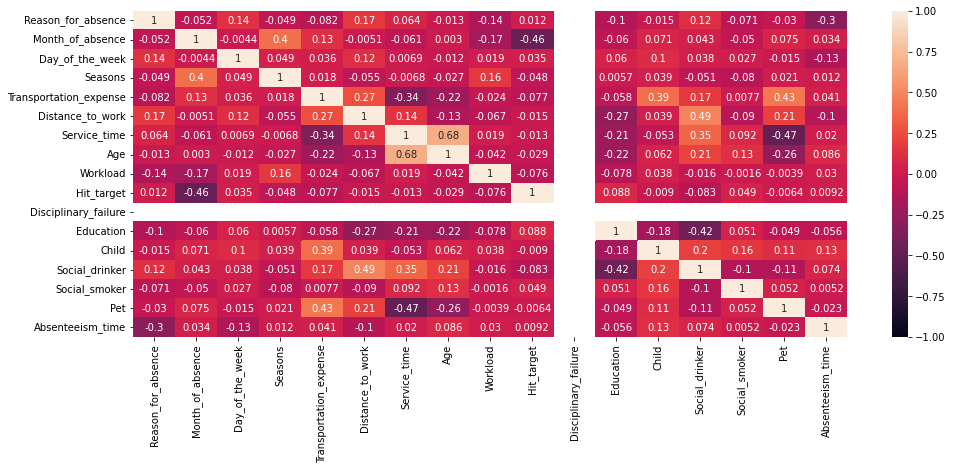

In [21]:
#Feature selection & review via heatmap 

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(clean_data.corr(), vmin=-1, vmax=1, annot=True)

#I want to review correlation and remove anything wth a correlation >=0.35

#Age & service time appear to have a high correlation of 0.68
#I will keep Age and remove service time 

#Month & Season have strong correlation of 0.4;
#I will keep Season and remove Month as Season is essentially a grouping of Months

#Distance to work and social drinker have a strong correlation of 0.49; 
#I will reove social drinker as it is more specific and less focused on my research question

#Hit target and month of absence have a strong negative correlation -0.46
#I will remove hit target

#I will remove disciplinary failure as it does not add value to the dataset as it is a qualitative variable 

#Transportation expense and child have a strong correlation of 0.39
#I will remove child


In [22]:
#Removing features based on correlation heat map results

clean_data1 = clean_data.drop('Month_of_absence', axis = 1)

In [23]:
clean_data2 = clean_data1.drop('Service_time', axis = 1)

In [24]:
clean_data3 = clean_data2.drop('Social_drinker', axis = 1)

In [25]:
clean_data4 = clean_data3.drop('Hit_target', axis = 1)

In [26]:
clean_data5 = clean_data4.drop('Disciplinary_failure', axis = 1)

In [27]:
clean_data6 = clean_data5.drop('Transportation_expense', axis = 1)

In [28]:
#Inspecting final shape 

clean_data6.shape

(696, 11)

In [29]:
clean_data6.describe()

,Reason_for_absence,Day_of_the_week,Seasons,Distance_to_work,Age,Workload,Education,Child,Social_smoker,Pet,Absenteeism_time
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,20.392241,3.920977,2.507184,29.853448,36.254310,271165.718391,1.303161,1.000000,0.066092,0.728448,7.362069
std,7.162846,1.430728,1.105880,14.855615,6.380725,39096.003153,0.685967,1.098069,0.248621,1.281679,13.628618
min,1.000000,2.000000,1.000000,5.000000,27.000000,205917.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,3.000000,2.000000,16.000000,31.000000,243659.250000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,23.000000,4.000000,2.000000,26.000000,37.000000,264249.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,27.000000,5.000000,3.250000,50.000000,40.000000,294217.000000,1.000000,2.000000,0.000000,1.000000,8.000000
max,28.000000,6.000000,4.000000,52.000000,58.000000,378884.000000,4.000000,4.000000,1.000000,8.000000,120.000000


In [30]:
#I also want to remove any reasons for absence >21 because the attribute information provided only listed 21 reasons so the data points >21 would be invalid inputs

clean_data6.drop(clean_data6[clean_data6['Reason_for_absence'] > 21].index, inplace = True)

In [31]:
clean_data6.describe()

,Reason_for_absence,Day_of_the_week,Seasons,Distance_to_work,Age,Workload,Education,Child,Social_smoker,Pet,Absenteeism_time
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,12.416031,3.687023,2.553435,27.358779,36.652672,279293.767176,1.385496,1.045802,0.103053,0.748092,13.522901
std,5.063449,1.373443,1.080570,14.292011,6.904214,43384.165953,0.737774,1.081808,0.304611,1.432216,20.483370
min,1.000000,2.000000,1.000000,5.000000,27.000000,205917.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,2.000000,2.000000,14.250000,31.000000,246074.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,13.000000,4.000000,3.000000,26.000000,37.000000,268519.000000,1.000000,1.000000,0.000000,0.000000,8.000000
75%,18.000000,5.000000,3.000000,36.000000,40.000000,306345.000000,1.000000,2.000000,0.000000,1.000000,8.000000
max,21.000000,6.000000,4.000000,52.000000,58.000000,378884.000000,4.000000,4.000000,1.000000,8.000000,120.000000


In [32]:
#I want to make Child a 0 or 1 variable so that the we are looking at if kids predict absenteeism; not number of kids 

clean_data6['Child'] = clean_data6['Child'].replace([4 , 3, 2] , 1)

In [33]:
#I want to make Pet a 0 or 1 variable so that the we are looking at if pets predict absenteeism; not number of pets

clean_data6['Pet'] = clean_data6['Pet'].replace([8, 5, 4, 2] , 1)

In [34]:
clean_data6.describe()

,Reason_for_absence,Day_of_the_week,Seasons,Distance_to_work,Age,Workload,Education,Child,Social_smoker,Pet,Absenteeism_time
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.00000,262.000000,262.000000,262.000000
mean,12.416031,3.687023,2.553435,27.358779,36.652672,279293.767176,1.385496,0.59542,0.103053,0.370229,13.522901
std,5.063449,1.373443,1.080570,14.292011,6.904214,43384.165953,0.737774,0.49175,0.304611,0.483790,20.483370
min,1.000000,2.000000,1.000000,5.000000,27.000000,205917.000000,1.000000,0.00000,0.000000,0.000000,1.000000
25%,10.000000,2.000000,2.000000,14.250000,31.000000,246074.000000,1.000000,0.00000,0.000000,0.000000,3.000000
50%,13.000000,4.000000,3.000000,26.000000,37.000000,268519.000000,1.000000,1.00000,0.000000,0.000000,8.000000
75%,18.000000,5.000000,3.000000,36.000000,40.000000,306345.000000,1.000000,1.00000,0.000000,1.000000,8.000000
max,21.000000,6.000000,4.000000,52.000000,58.000000,378884.000000,4.000000,1.00000,1.000000,1.000000,120.000000


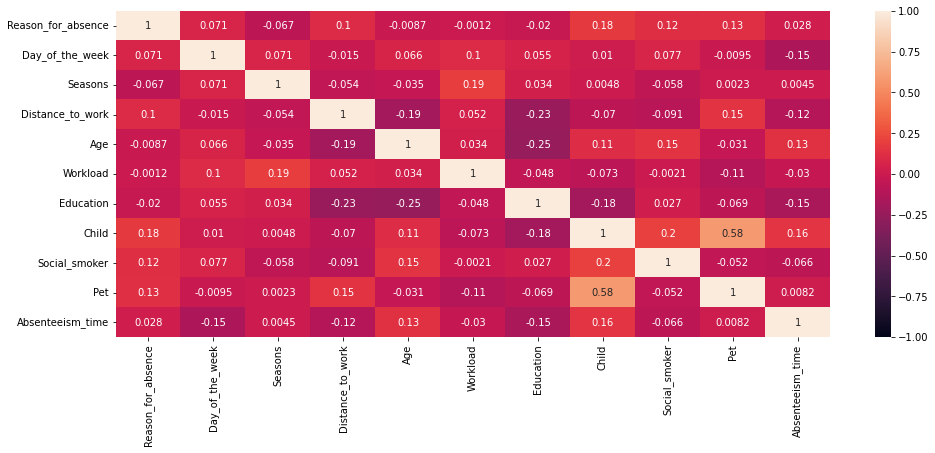

In [35]:
#I want to re-evaluate the correlation of the variables 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(clean_data6.corr(), vmin=-1, vmax=1, annot=True)

In [36]:
#Overall view of most common occurances 

clean_data6.mode()

,Reason_for_absence,Day_of_the_week,Seasons,Distance_to_work,Age,Workload,Education,Child,Social_smoker,Pet,Absenteeism_time
0,13,2,3,26,28,343253,1,1,0,0,8


**3a. Models Evaluation - Decision Tree**
---
---



In [37]:
#Dataframe for Decision Tree

dt_data = clean_data6

In [38]:
#Importing required packages

import pandas
from sklearn import tree
import matplotlib.pyplot as plt

In [39]:
#Target Column is Absenteeism in Time; I must pick features to use in the decision tree. I will decide these features based on what has the best correlation to the value I am trying to predict which is absenteeism time 
#My first decision tree I will build with few features and then will add as required to gain accuracy

features = ['Child', 'Education']

X = dt_data[features] #Features 
y = dt_data.Absenteeism_time #Target

In [40]:
#Splitting the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [42]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [43]:
#checking test set

X_test

,Child,Education
729,1,1
24,1,1
299,0,3
194,0,1
682,1,1
...,...,...
719,0,3
198,1,1
531,1,1
287,1,1


In [44]:
predictions = clf.predict(X_test)
predictions

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

In [45]:
#Reviewing accuracy of the decision tree. The decision tree is not overly accurate at ~42%

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.4177215189873418

**3b. Models Evaluation - Naive Bayes**
---
---

In [46]:
#Dataframe for Naive Bayes

nb_data = clean_data6

In [47]:
#Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X, y)

GaussianNB()

In [49]:
features = ['Child', 'Education']

X = nb_data[features] #Features 
y = nb_data.Absenteeism_time #Target

In [50]:
#Splitting the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [51]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.25      0.25      0.25         8
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0
           8       0.50      0.03      0.06        33
          16       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         1
          40       0.33      0.25      0.29         4
          64       0.00      0.00      0.00         3
          80       0.03      1.00      0.05         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         2

    accuracy                           0.06        79
   macro avg       0.08      0.11      0.05        79
weighted avg       0.25      0.06      0.06        79



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [53]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

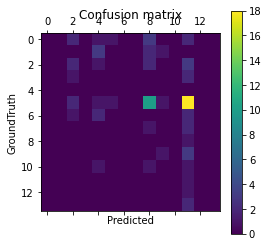

[[ 0  0  2  0  1  1  0  0  3  0  0  2  0  0]
 [ 0  0  0  0  3  0  0  0  2  1  0  0  0  0]
 [ 0  0  2  0  1  0  0  0  2  0  0  3  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  1  0  0 10  1  0 18  0  0]
 [ 0  0  1  0  2  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  3  0  0]
 [ 0  0  0  0  1  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0]]


In [54]:
conftable(y_test,y_pred,"conf")

In [55]:
#Accuracy is lower with Naive Bayes than Decision Tree

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.06329113924050633


**3c. Model Evaluation - Logistic Regression**
---
---

In [56]:
#data for logistic regression
lr_data = clean_data6

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression(random_state = 0)

In [59]:
features = ['Child', 'Education']

X = nb_data[features] #Features 
y = nb_data.Absenteeism_time #Target

In [60]:
#Splitting the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [61]:
logmodel.fit(X,y)

LogisticRegression(random_state=0)

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         3
           8       0.42      1.00      0.59        33
          16       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         3
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         4
          64       0.00      0.00      0.00         3
          80       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         2

    accuracy                           0.42        79
   macro avg       0.03      0.08      0.05        79
weighted avg       0.17      0.42      0.25        79



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,predictions)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

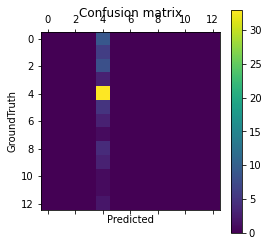

[[ 0  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0]]


In [65]:
conftable(y_test,predictions,"conf")

In [66]:
print("Accuracy: ", metrics.accuracy_score(y_test,predictions))

Accuracy:  0.4177215189873418


In [84]:
%%shell 
jupyter nbconvert --to html //content/L_Watson_Final_Results_and_the_Code.ipynb

[NbConvertApp] Converting notebook //content/L_Watson_Final_Results_and_the_Code.ipynb to html
[NbConvertApp] Writing 688605 bytes to //content/L_Watson_Final_Results_and_the_Code.html
